[[ 0.91113329 -0.06831292]
 [-0.78991504  0.72459508]
 [ 0.26562305  1.19573362]
 [ 0.90593572 -0.4899344 ]
 [ 1.04493203  0.16523877]
 [ 1.03059679 -0.63351989]
 [-0.37331109  0.66197783]
 [ 0.13309309  0.18668236]
 [ 0.13021102  1.07933086]
 [-1.15323597 -0.28651121]
 [ 1.65627586  0.60368826]
 [-0.0186536   0.75368325]
 [-1.24535811 -0.40556078]
 [-0.50342194  0.85420626]
 [-0.67561345 -0.16191051]
 [-0.32393343  0.79197268]
 [-0.69331428  0.87166088]
 [ 0.11339705 -0.31860431]
 [ 0.03439124  0.90974771]
 [ 0.39598894  0.63775584]
 [ 1.51156398 -0.32182452]
 [-1.26147124  0.25473339]
 [ 0.17288773  0.29440291]
 [ 0.89943257  0.18797936]
 [ 1.32603569  0.03566213]
 [-0.04212043  0.76266709]
 [-0.41801956  0.83420578]
 [ 0.72365217 -0.33505388]
 [ 0.32058895 -0.01739295]
 [ 0.85656594  1.03139898]
 [ 1.67749953  0.01231649]
 [ 0.33903727 -0.21974092]
 [ 0.53106647  1.0842828 ]
 [ 1.6126332  -0.14985898]
 [ 1.5535192  -0.36496845]
 [-0.69756623  0.16438686]
 [ 0.86347911  0.67752554]
 

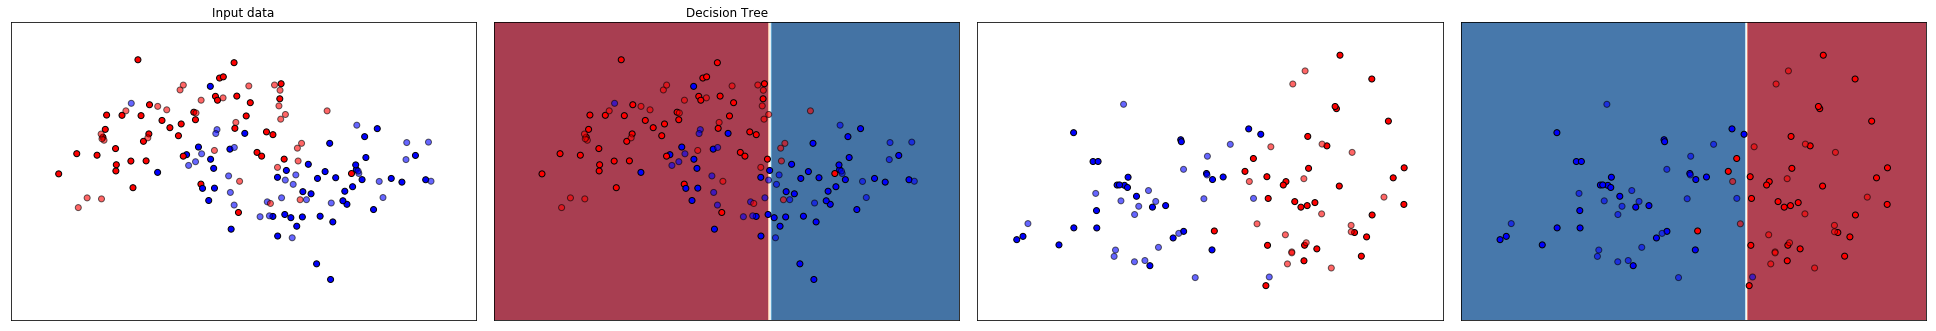

In [7]:
#print(doc)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

h = .05  # step size in the mesh

names = ["Decision Tree"]

classifiers = [
    DecisionTreeClassifier(max_depth=1),
    DecisionTreeClassifier(max_depth=1),
    AdaBoostClassifier()
]
#dp1 = iris[['sepal_length','petal_width']]
#dp2 = iris['species'].tolist()
#dx = dp1.values
#dy = dx.tolist()
#dz = tuple(dy)
#print(dz)
#print(dataset5)
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(n_samples = 150,noise=.3, random_state=0),
            linearly_separable
            ]
#print(datasets[0])
figure = plt.figure(figsize=(27, 9))
i = 1
#print(dataset1[0])
l = []
#print("original",type(dy))
print(datasets[0][0])
print("data after normalization")
for ds_cnt, ds in enumerate(datasets):
    #preprocess dataset, split into training and test part
    X, y = ds
   # X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    #print(score)
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        #score = clf.score(X_test, y_test)
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        #ax.text(xx.max() - .3, yy.min() + .3,('%.2f' % score).lstrip('0'), size=30, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()